In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from os.path import join
from scipy.interpolate import UnivariateSpline
from scipy.signal import savgol_filter

# Apply Savitzky–Golay filter with a window length of 11 and a polynomial order of 2



In [40]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

def plot_single(x, ys, title, xlabel, ylabel, **kwargs):
    plt.figure(figsize=(12, 7.5))
    for (y,yl) in ys:
        plt.plot(x, y, linestyle='-', label=yl)
    plt.title(title)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [41]:
def from_csv(path):
    df = pd.read_csv(path)
    return {column:df[column].to_numpy().astype(np.float32) for column in df.columns}

def get_latest_plot_data():
    outer_dir = sorted(filter(lambda f: os.path.isdir(f), os.listdir('exp_local/')))[-1]
    inner_dir = sorted(filter(lambda f: os.path.isdir(f), os.listdir(outer_dir)))[-1]
    return f"{inner_dir}/eval.csv"

In [42]:
def get_latest_dir(neg_offset=-1):
    base_path = 'exp_local'
    format_inner = lambda f: join(base_path, f)
    outer_dir = sorted(filter(lambda f: os.path.isdir(format_inner(f)) and f.endswith('_sac'), 
                            os.listdir(base_path)))[-1]
    outer_dir = format_inner(outer_dir)
    format_outer = lambda f: join(outer_dir, f)
    inner_dir = sorted(filter(lambda f: os.path.isdir(format_outer(f)),
                            os.listdir(outer_dir)))[neg_offset]
    return format_outer(inner_dir)

def get_latest_plot_data(csv_file, neg_offset=-1    ):
    dir = get_latest_dir(neg_offset)
    return join(dir, csv_file)

def get_all_loss_curves(neg_offset=-1):
    dir = get_latest_dir(neg_offset)
    loss_curve_files = sorted(filter(
        lambda f: os.path.isfile(os.path.join(dir, f))
        and f.startswith('loss_curve'),
        os.listdir(dir)))
    loss_curves = [np.load(os.path.join(dir, f)) for f in loss_curve_files]
    return loss_curves

exp_local/2025.03.28_sac/214807/train.csv


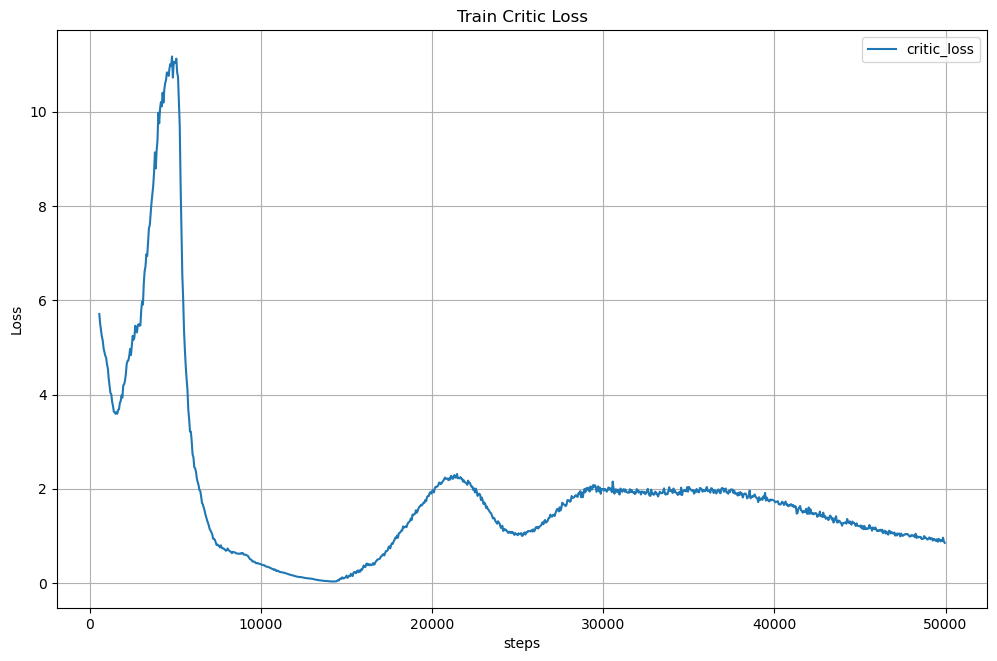

In [49]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'],
            [(d['critic_loss'],'critic_loss')],
            "Train Critic Loss",
            "steps",
            "Loss")

exp_local/2025.03.28_sac/214807/train.csv


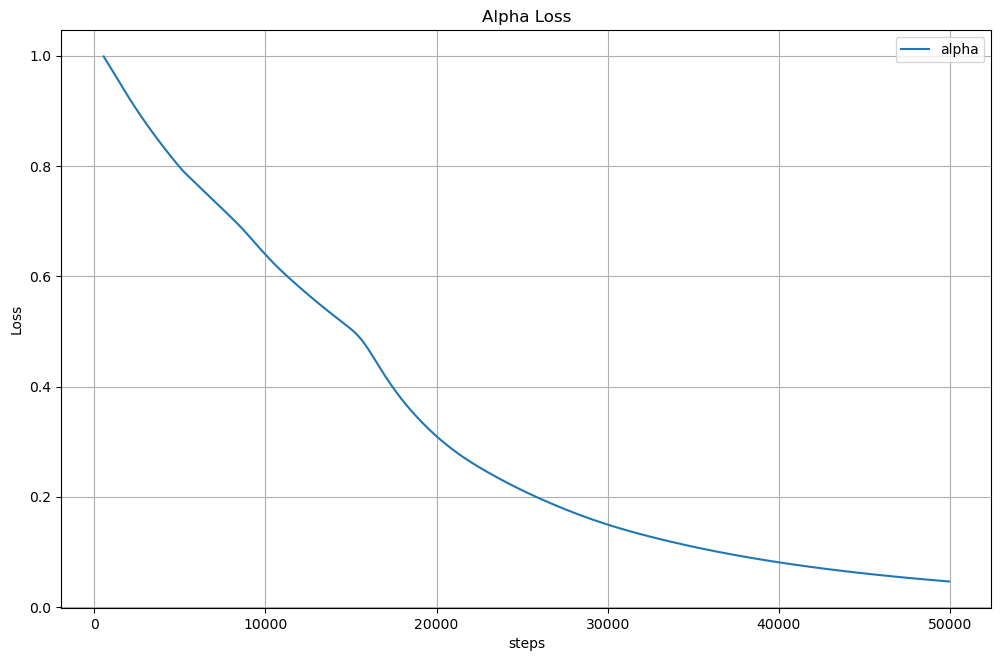

In [44]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(d['alpha'],'alpha')],
            "Alpha Loss",
            "steps",
            "Loss")

exp_local/2025.03.28_sac/214807/train.csv


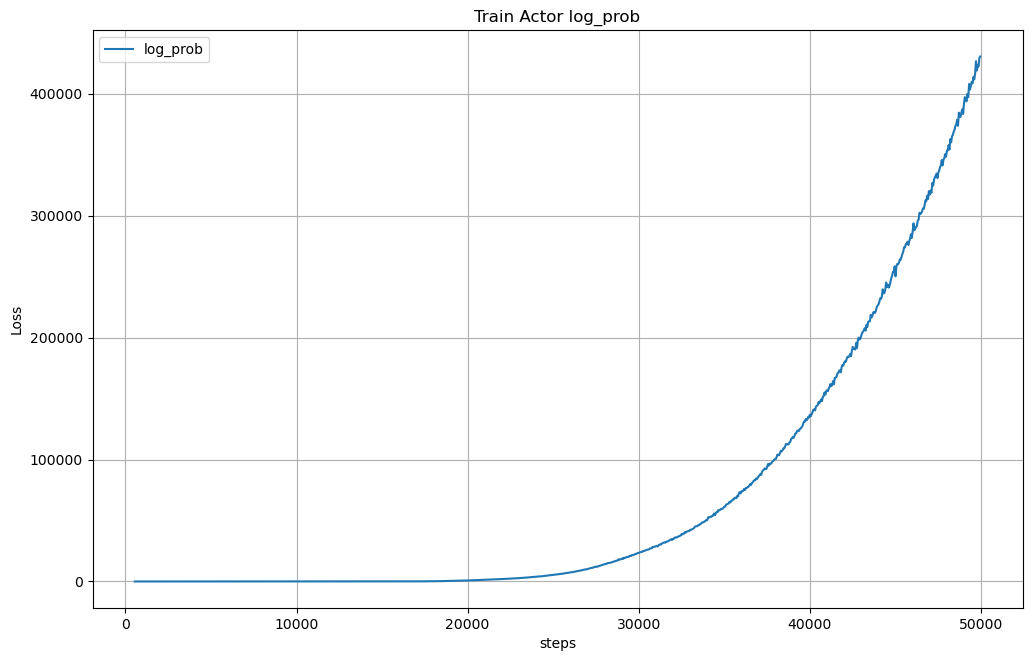

In [45]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(-d['actor_logprob'],'log_prob')],
            "Train Actor log_prob",
            "steps",
            "Loss")

exp_local/2025.03.28_sac/214807/train.csv


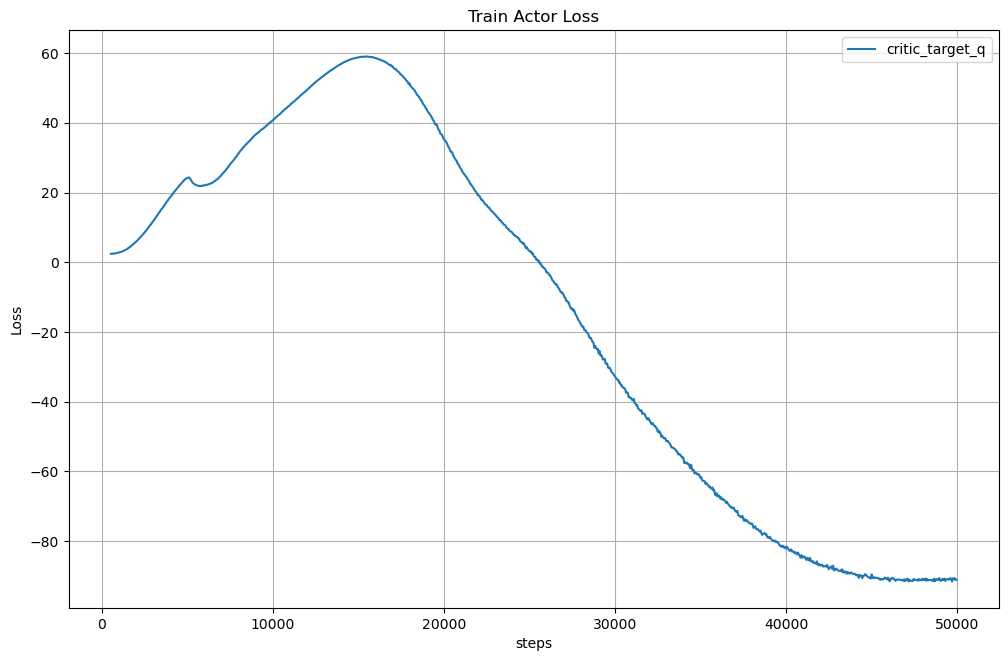

In [46]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(-d['critic_target_q'],'critic_target_q')],
            "Train Actor Loss",
            "steps",
            "Loss")

exp_local/2025.03.28_sac/214807/train.csv


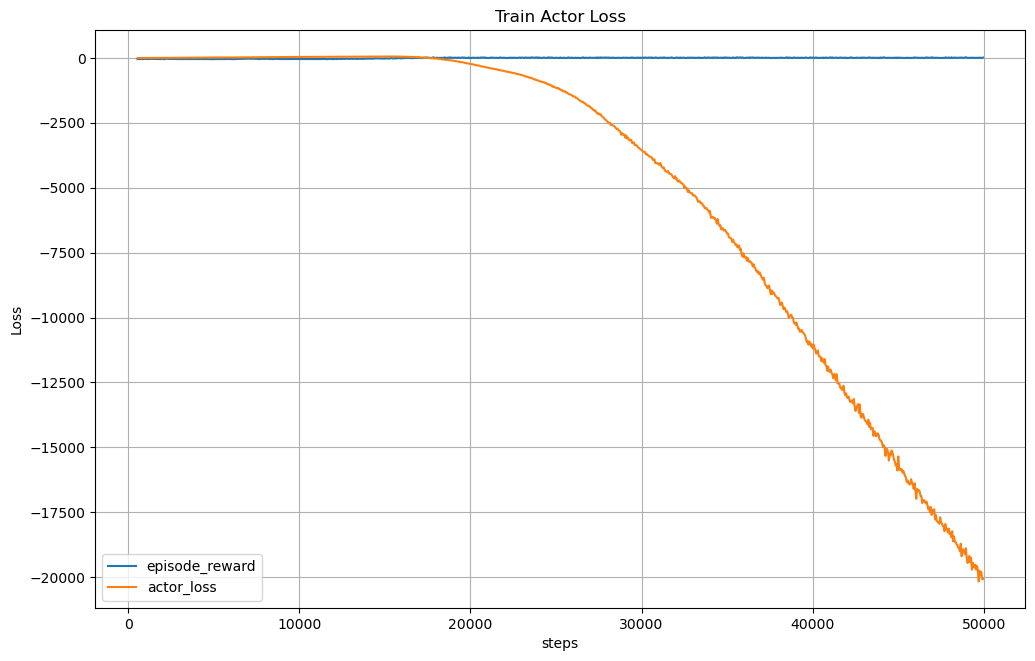

In [47]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(d['episode_reward'],'episode_reward'),
            (d['actor_loss'],'actor_loss')],
            "Train Actor Loss",
            "steps",
            "Loss")

exp_local/2025.03.28_sac/214807/eval.csv


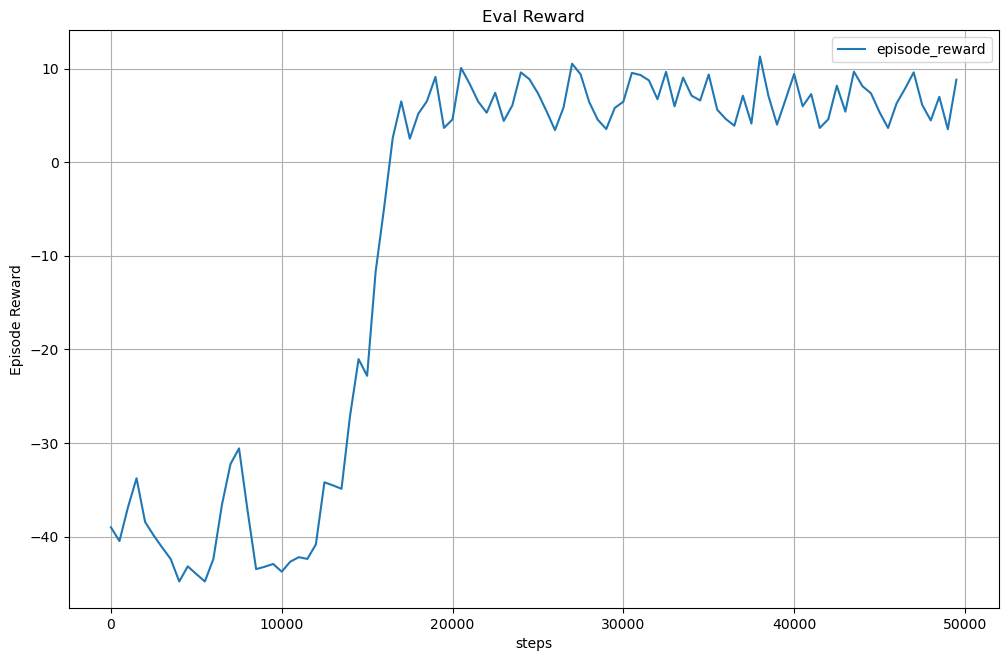

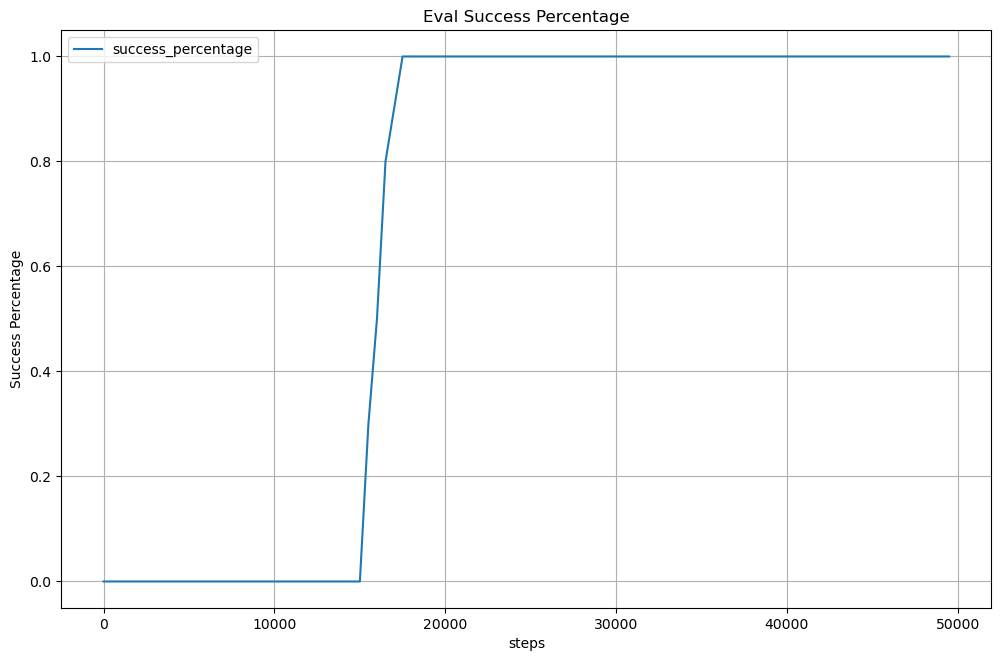

In [48]:
path = get_latest_plot_data('eval.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(d['episode_reward'],'episode_reward')],
            "Eval Reward",
            "steps",
            "Episode Reward")
plot_single(d['step'], 
            [(d['success_percentage'],'success_percentage')],
            "Eval Success Percentage",
            "steps",
            "Success Percentage")

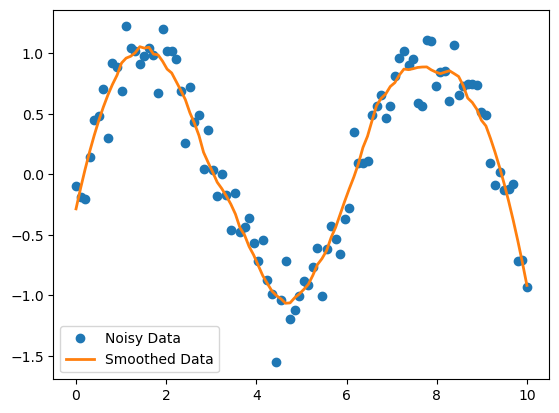

In [478]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Example data: a sine curve with noise
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

# Apply Savitzky–Golay filter with a window length of 11 and a polynomial order of 2
y_smooth = savgol_filter(y, window_length=20, polyorder=2)

plt.plot(x, y, 'o', label='Noisy Data')
plt.plot(x, y_smooth, '-', label='Smoothed Data', linewidth=2)
plt.legend()
plt.show()


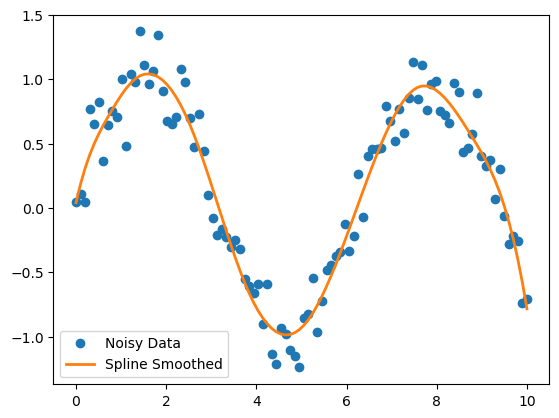

In [272]:
from scipy.interpolate import UnivariateSpline

# Create a smoothing spline; adjust 's' for smoothness (smaller s => closer fit)
spline = UnivariateSpline(x, y, s=3)
y_spline = spline(x)

plt.plot(x, y, 'o', label='Noisy Data')
plt.plot(x, y_spline, '-', label='Spline Smoothed', linewidth=2)
plt.legend()
plt.show()